# Ejercicios Pair Programming - Módulo 2 Sprint 2
## Lección 13 - Limpieza III 

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

¿Cuál es el rango de edad que sufre la mayoría de los ataques?

Independientemente de la edad, sufren los hombres más ataques que las mujeres?

¿En qué mes ocurren más ataques?

¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Si reducimos esto a una tabla para saber que tenemos ya limpito y que no. **Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

variable

¿Está limpia?

age

✔️ esta en formato string cuando debería ser integer y en algunos casos tenemos rangos de edad

species

✔️ es un jaleo! Debemos unificar los nombres y reducir a las especies más importantes

country

✔️ los paises están en mayúsculas, algunos se repiten con algunos cambios

fatal

✔️ la limpiamos en el pair de Pandas V

year

✔️ es una columna de tipo float deberíamos convertirla a integer

sex

✔️ la limpiamos en el pair de Pandas V

fecha

✔️ la limpiamos en el pair de Pandas V
​ 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("limpieza2.csv", index_col = 0)
df.head(2)

,year,country,activity,age,species_,mes,fatal,sex,especie tiburon,age_ok
0,2018,usa,Paddling,57,White shark,Jun,N,F,White shark,57.0
1,2018,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,18.0


Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información.

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

1.- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


Los outliers solo se pueden eliminar en las columnas numéricas que son:

In [5]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head(2)

,year,age_ok
0,2018,57.0
1,2018,18.0


2.- Identifica visualmente los outliers

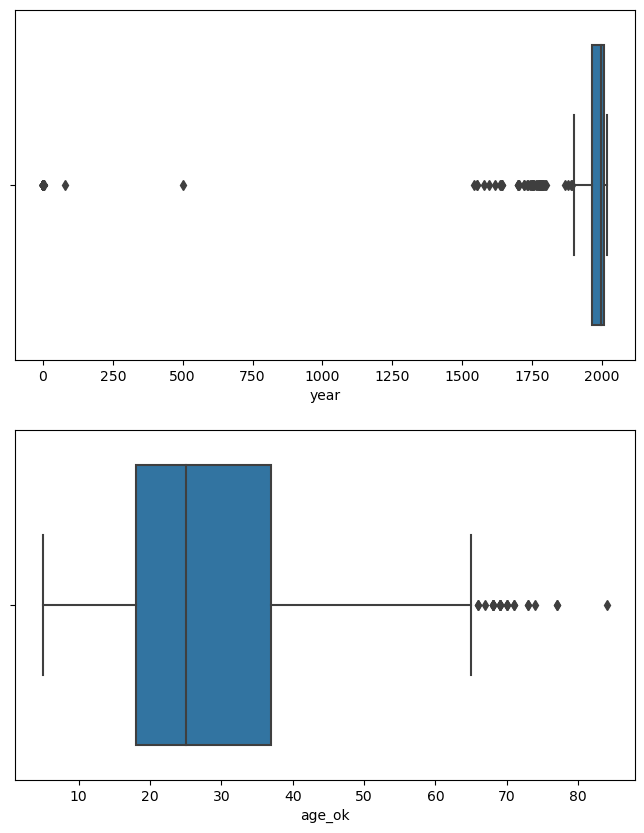

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(8,10))

for i, col in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[col], data=df_numericas, ax=ax[i])
plt.show()

Como observamos en el boxplot de edades, solo hay outliers en el límite superior, son personas de edad avanzada.

En el boxplot de year podemos deducir que hay errores en la introduccion de los datos, años con valor inferior a 1500, y por otro lado, que empieza a haber un registro de los mismos a partir del año 1550 al 1850.

3.- Identifica sobre el dataframe las filas que son outliers

In [9]:
# Función para detectar outliers
def detectar_outliers(lista_columnas, dataframe):
    # Diccionario para almacenar los índices de los outliers
    dicc_indices = {}
    # Iterar por la lista de las columnas numéricas del dataframe
    for col in lista_columnas:
        # Calcular los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        # Calcular el rango intercuartilico
        IQR = Q3 - Q1
        # Para calcular el limite
        outlier_step = 1.5 * IQR
        # Filtrar el dataframe para identificar los outliers
        df_outliers = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        # Si el DataFrame de outliers tiene algún registro
        if df_outliers.shape[0] > 0:
            # Insertar en el diccionario la columna y los índices outliers
            dicc_indices[col] = list(df_outliers.index)
    return dicc_indices

In [10]:
lista_columna_numerica = list(df_numericas.columns)
lista_columna_numerica

['year', 'age_ok']

In [11]:
dicc_indices_outlier = detectar_outliers(lista_columna_numerica, df_numericas)

In [13]:
print(dicc_indices_outlier)

{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1659, 1660, 1661, 1662, 1663, 1665, 1666, 

4.- Reemplaza los outliers por el estadístico más correcto.

In [17]:
# Creamos una copia del dataframe numérico para sustituir en el los valores outliers con la mediana.
df_numericas_sin_outlier = df_numericas.copy()

In [18]:
for k, v in dicc_indices_outlier.items():
    # Calcular la media de la columna del diccionario en el dataframe
    mediana = df[k].median()
    # Iterar por los indices de la lista de valores de cada columna
    for i in v:
        # Utilizando loc, reemplazamos los valores de los outliers
        df_numericas_sin_outlier.loc[i,k] = mediana

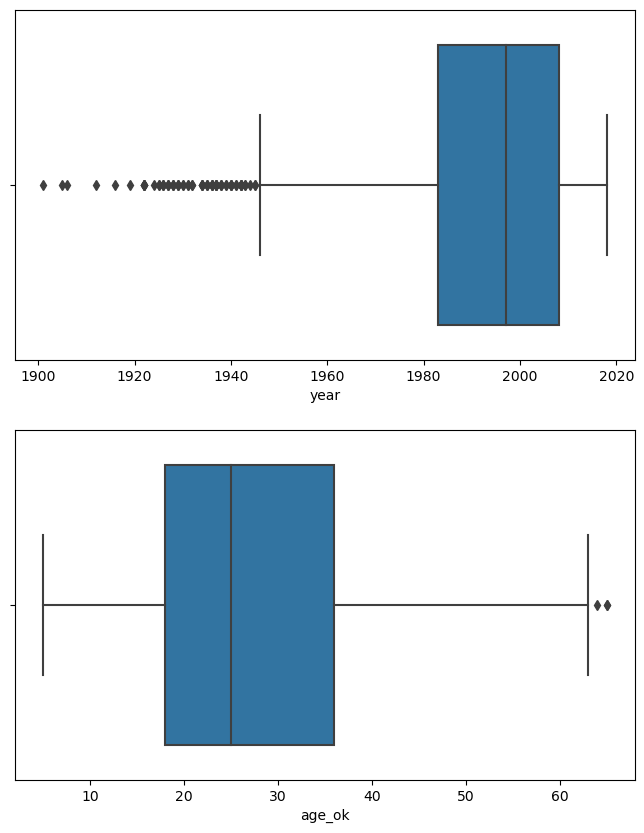

In [19]:
# Mostramos el dataframe sin outliers
fig, ax = plt.subplots(2, 1, figsize=(8,10))

for i, col in enumerate(df_numericas_sin_outlier.columns):
    sns.boxplot(x = df_numericas_sin_outlier[col], data=df_numericas_sin_outlier, ax=ax[i])
plt.show()

Como observamos ya hemos sustituido los outliers por la mediana, pero ahora nos vuelven a aparecer otros outliers, ya que el valor de la mediana se ha modificado. Tenemos menos outliers que al principio y mucho más cercanos a los límites inferior y superior. Incluso en la columna "age_ok" solo quedan 2 outliers pudiendose éstos eliminar porque no afectaría a nuestro análisis.

5.- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [28]:
# creamos una copia del dataframe original, le eliminamos las columnas numéricas y le 
# añadimos el dataframe numérico sin outliers

df_final = df.copy()
df_final.drop(lista_columna_numerica, axis = 1, inplace = True)
df_final = df_final.join(df_numericas_sin_outlier, how = 'inner')
df_final.head()

,country,activity,age,species_,mes,fatal,sex,especie tiburon,year,age_ok
0,usa,Paddling,57,White shark,Jun,N,F,White shark,2018,57.0
1,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,2018,18.0
2,usa,Walking,15,"Bull shark, 6'",May,N,M,Bull shark,2018,15.0
3,australia,Feeding sharks,32,Grey reef shark,May,N,M,Grey shark,2018,32.0
4,england,Fishing,21,Invalid incident,May,N,M,Unspecified,2018,21.0


In [ ]:
df_final.to_csv("limpieza3.csv")

Happy coding 🦈